In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
import pandas_datareader as data
from pandas_datareader import data as pdr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

yf.pdr_override()

#creating a start date and end date
start = '2010-01-01'
end =  datetime.today().strftime("%Y-%m-%d")
#end = '2019-12-31'

company = 'TSLA'
#company = 'MSFT'

#creating the dataframe
df= pdr.get_data_yahoo(company, start, end)

#getting the first 5 rows and the last 5 rows
print(df.head(5))
print(df.tail(5))

df.shape

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-11  122.089996  125.949997  120.510002  123.220001  123.220001   
2023-01-12  122.559998  124.129997  117.000000  123.559998  123.559998   
2023-01-13  116.550003  122.629997  115.599998  122.400002  122.400002   
2023-01-17  125.699997  131.699997  125.019997  13

(3161, 6)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
------------------------------checking data information-------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3161 entries, 2010-06-29 to 2023-01-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3161 non-null   float64
 1   High       3161 non-null   float64
 2   Low        3161 non-null   float64
 3   Close      3161 non-null   float64
 4   Adj Close  3161 non-null   float64
 5   Volume     3161 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 172.9 KB
------------------------------checking data shape-------------
(3161, 6)
------------------------------checking data description-------------
              Open         High          Low        Close    Adj Close  \
count  3161.000000  3161.000000  3161.000000  3161.000000  3161.000000   
mean     59.068458    60.393393    57.601274    59.018292    59.01

<AxesSubplot: xlabel='Date'>

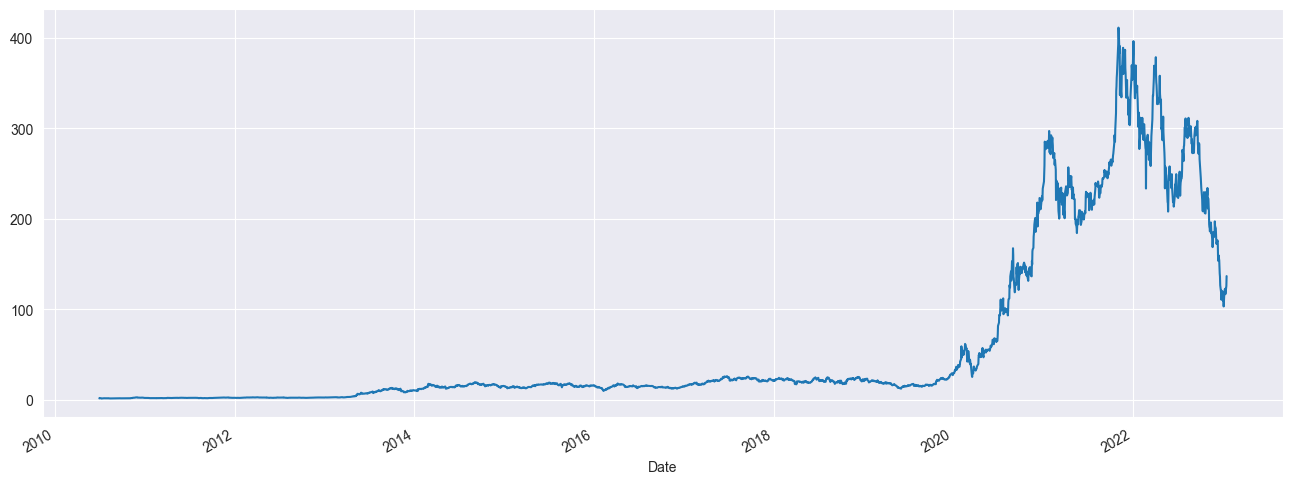

In [11]:
#checking if there are any missing datas
missing_data = df[df.isna().any(axis=1)]
print(missing_data)
print("------------------------------checking data information-------------")
df.info()
print("------------------------------checking data shape-------------")
print(df.shape)
print("------------------------------checking data description-------------")
print(df.describe())
df['Open'].plot(figsize=(16,6))

In [12]:
#dropping the adj close column as it is not needed since it similar to the close column and also the date column
df = df.reset_index()
df.head()
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


In [13]:
#seperate the data into train and test data

train_headers = ['High','Low', 'Open','Volume']
target_headers = ['Close']

x = df[train_headers]
y = df[target_headers]['Close']

print(x.shape)
print(y.shape)

#we are going to scale down all the values we have so that they fit inbetween 0 and 1
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0,1))
x = pd.DataFrame(scaler.fit_transform(x), columns=train_headers)


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state =1)

print(X_train.shape)
print(X_test.shape)

(3161, 4)
(3161,)
(2212, 4)
(949, 4)


Feature importances

The coefficient of the model is  [ 353.22944085  329.90038197 -275.11970094    0.78357349]
The intercept of the model is  1.0006382105815916


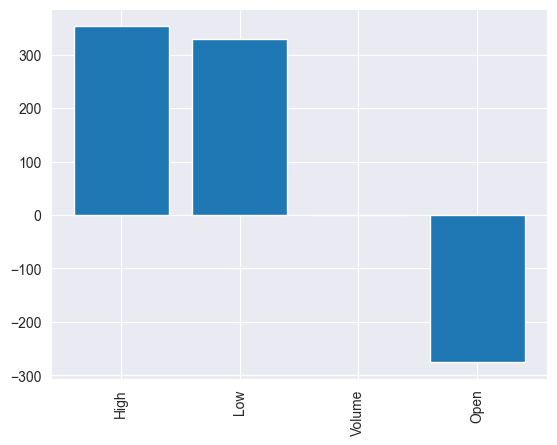

In [14]:
# setting up the Linear regression model
from sklearn.linear_model import LinearRegression

rgr = LinearRegression()
rgr.fit(X_train, y_train)

#getting the coefficient and intercept of the model
print('The coefficient of the model is ',rgr.coef_)
print('The intercept of the model is ',rgr.intercept_)

importances = rgr.coef_
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]


# Get the feature names
feature_names = list(X_train.columns)

# Rearrange the feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create a bar plot
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show the plot
plt.show()

In [15]:

#predict the model
y_pred = rgr.predict(X_test)
print(y_pred)
print(y_test)

print(X_test)

#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)

r2_score = rgr.score(X_test, y_test)
print("Test set R^2: {:.2f}".format(r2_score))

[ 16.7851101    1.96997605  22.06013122   2.5894272    6.13553094
  22.3880413   22.95150507   1.56233378  22.33416202 235.68872554
  13.58496962 143.82885471 326.92913037   2.06723922 112.53730298
  18.39702098  16.13591426  20.74419169  15.21714474 218.68071439
   1.33002784   1.6325604  201.57158031  99.06788087  13.36321962
   2.20014716  24.37188969  18.12306679  21.37124768   1.95665835
   1.68241362 142.33158556 344.54671259   1.33092418 340.66449916
  11.81225049 285.94184363   1.44038334   1.90318895  19.97347151
   1.98414093  16.83194686 224.14766115   1.33232968  15.77182552
  13.71462972  17.78115259   1.99057104   1.65584405 200.4428153
   2.05819616 361.05468126  13.18927254   1.73815206   1.73847492
  54.29050671 112.28871717  11.82148109  25.08236551   1.27531287
  15.66361622  15.6063308    1.92552838   1.85499795  14.89395632
  23.2072254    1.18122494   1.78585354  13.64253408  16.46742532
   2.12311795  53.68732538  13.87608902   1.92417469  24.28814495
  17.455747

In [16]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
1467     16.764668        16.785110
481       2.018667         1.969976
1932     22.341333        22.060131
678       2.606667         2.589427
730       6.182000         6.135531
...            ...              ...
2902    354.899994       346.576180
270       1.899333         1.883037
3079    300.799988       306.560193
1260     17.943333        17.956800
1631     13.515333        13.461843

[949 rows x 2 columns]


In [19]:
dfr.head(100)

,Actual Price,Predicted Price
1467,16.764668,16.785110
481,2.018667,1.969976
1932,22.341333,22.060131
678,2.606667,2.589427
730,6.182000,6.135531
...,...,...
2841,263.980011,265.656702
1748,24.666668,24.581920
1036,17.288000,17.528401
1395,13.354000,13.520408


<AxesSubplot: >

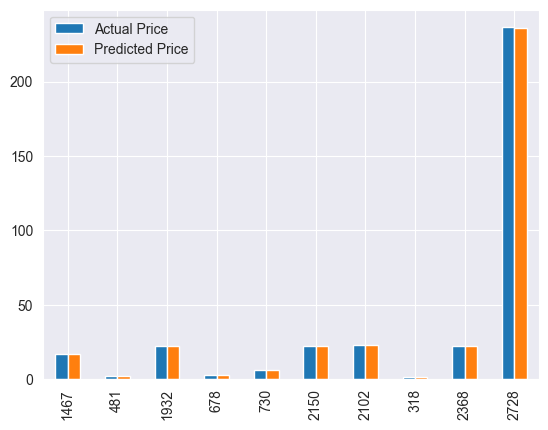

In [18]:
graph=dfr.head(10)
graph.plot(kind='bar')